#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de las Semanas 5 y 6**
###**Problema de asignación de créditos: South German Dataset.**

## **Nombre y matrícula:**
Angel Rodriguez Cardenas
A00618978

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [17]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [11]:
# Cargamos los datos:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

Saving SouthGermanCredit.asc to SouthGermanCredit (1).asc
(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [12]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:
english_column_names = [
    'status', 'duration', 'credit_history', 'purpose', 'amount',
    'savings', 'employment_duration', 'installment_rate', 'personal_status_sex',
    'other_debtors', 'present_residence', 'property', 'age',
    'other_installment_plans', 'housing', 'number_credits', 'job',
    'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
df.columns = english_column_names

None   # NOTA: Tanto aquí como en lo sucesivo, "None" puede indicar una o varias líneas de código.

# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


## **Ejercicio 2**

In [25]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.


# ************* Inlcuye aquí tu código:*****************************

df['credit_risk'] = 1 - df['credit_risk']
df.head()
# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

1    700
0    300
Name: credit_risk, dtype: int64


## **Ejercicio 3**

In [15]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:
target_column = 'credit_risk'
X = df.drop(target_column, axis=1)
y = df[target_column]

# ************* Inlcuye aquí tu código:*****************************

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_encoded, test_size=0.15, random_state=1, stratify=y)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=len(ytest), random_state=1, stratify=ytrain)

# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 4**

In [43]:
df.columns = english_column_names

data_types = df.dtypes

categorical = []
numerical = []

for column, data_type in data_types.items():
    if data_type == 'object' or data_type.name.startswith('category') or len(df[column].unique()) < 20:
        categorical.append((column, len(df[column].unique())))
    else:
        numerical.append(column)

print("Variables categóricas y número de niveles:")
for cat, levels in categorical:
    print(f"{cat}: {levels} niveles")
print("\nVariables numéricas:")
print(numerical)

Variables categóricas y número de niveles:
status: 4 niveles
credit_history: 5 niveles
purpose: 10 niveles
savings: 5 niveles
employment_duration: 5 niveles
installment_rate: 4 niveles
personal_status_sex: 4 niveles
other_debtors: 3 niveles
present_residence: 4 niveles
property: 4 niveles
other_installment_plans: 3 niveles
housing: 3 niveles
number_credits: 4 niveles
job: 4 niveles
people_liable: 2 niveles
telephone: 2 niveles
foreign_worker: 2 niveles
credit_risk: 2 niveles

Variables numéricas:
['duration', 'amount', 'age']


### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### **Variables Categóricas:**

1. status: Al contar con numeros son identificados como una categoria, lo vuelve categorica. (4 niveles)
2. credit_history: Representa distintos historiales de los clientes, los ordena y categoriza. (5 niveles)
3. purpose: El proposito del credito esta señalizado como categorias. (10 niveles)
4. savings: Hace categorías sobre el monto ahorrado. (5 niveles)
5. employment_duration :Hace agrupaciones según la duración del empleo, esto ya lo vuelve categorico. (5 niveles)
6. installment_rate: Te da una clasificación según las tasas. (4 niveles)
7. personal_status_sex: Son datos no números que sirven para categorizar clientes en este caso genero y estado civil. (4 niveles)
8. other_debtors: Clasifica a los otros deudores. (3 niveles)
9. present_residence: Estatus en la residencia actual. (4 niveles)
10. property: Diferentes niveles y tipos de propiedad. (4 niveles)
11. other_installment_plans: Cateogría dependiendo el tipo d eplanes de pago.. (3 niveles)
12. housing: Categoriza el tipo de vivienda. (3 niveles)
13. number_credits: Historial Crediticio. (4 niveles)
14. job: Categoriza el tipo de trabajo o empleo. (4 niveles)
15. people_liable: Número de personas dependientes del cliente. (2 niveles)
16. telephone: El numero de teléfono siempre es distinto, lo cual genera una categoría. (2 niveles)
17. foreign_worker: Indicador de si el cliente es extranjero. (2 niveles)
18. credit_risk: Clasificaciónd el riesgo. (2 niveles)

### **Variables Numéricas:**

1. duration: La duración del crédito en meses, esto es una cantidad numerica que se puede hacer un cálculo matemático.
2. amount: La cantidad de dinero es numerico.
3. age: Es una cantidad numerica en años, si fuera agrupada por rangos cambiaría a categorica.

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

In [ ]:
 # Puedes incluir a continuación todas las celdas de código que requieras....

In [60]:
#Valores Faltantes
total = df.isnull().sum().sort_values(ascending=False)
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) * 100

valores_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
print(valores_faltantes)

                         Total  Porcentaje
status                       0         0.0
property                     0         0.0
foreign_worker               0         0.0
telephone                    0         0.0
people_liable                0         0.0
job                          0         0.0
number_credits               0         0.0
housing                      0         0.0
other_installment_plans      0         0.0
age                          0         0.0
present_residence            0         0.0
duration                     0         0.0
other_debtors                0         0.0
personal_status_sex          0         0.0
installment_rate             0         0.0
employment_duration          0         0.0
savings                      0         0.0
amount                       0         0.0
purpose                      0         0.0
credit_history               0         0.0
credit_risk                  0         0.0


In [52]:
#resumen estadístico con variables numericas....
resumen_numerico = df[num_lista].describe()
print(resumen_numerico)


          duration       amount         age
count  1000.000000   1000.00000  1000.00000
mean     20.903000   3271.24800    35.54200
std      12.058814   2822.75176    11.35267
min       4.000000    250.00000    19.00000
25%      12.000000   1365.50000    27.00000
50%      18.000000   2319.50000    33.00000
75%      24.000000   3972.25000    42.00000
max      72.000000  18424.00000    75.00000


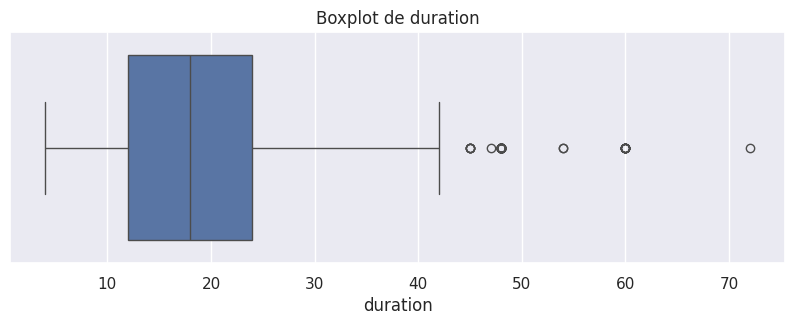

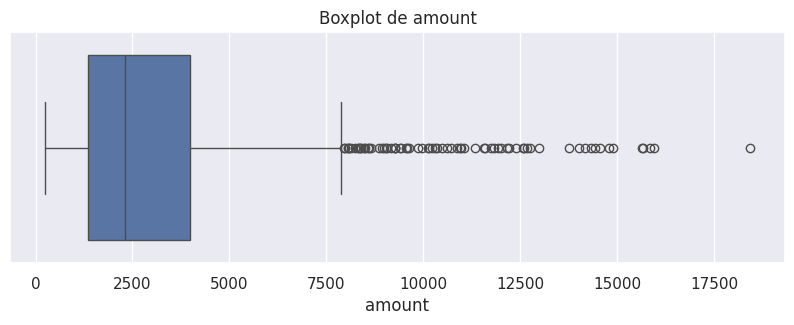

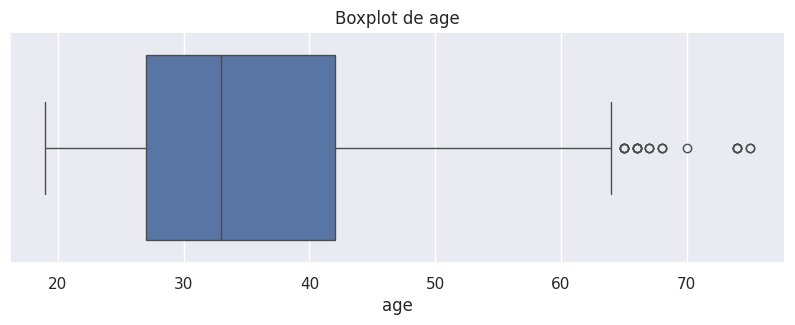

In [59]:
#Deteccion de valores atipicos
for columna in num_lista:
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de {columna}")
    plt.show()


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++
-Primero decidí hacer un análsis de valores faltantes, lo cual resultó a que no tenía ningún valor faltante. No requiere ninguna transformación.
-Después analize de las variables númericas sus estadísticas generales.
-Adicional saqué un analisis de boxplot para ver los datos "outliers"
-Finalmente decidí hacer la transformación del resto de las columnas que son categoricas a numericas para poder hacer un análisis adecuado más adelante, ya que algunas de ellas al momento de agrupar sus resultados evitan poder hacer un análisis estadístico más exacto.


### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [73]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Definición de las columnas numéricas y categóricas
num_cols = ['duration', 'amount', 'age']
cat_cols = ['status', 'credit_history', 'purpose', 'savings',
           'employment_duration', 'installment_rate', 'personal_status_sex',
           'other_debtors', 'present_residence', 'property',
           'other_installment_plans', 'housing', 'number_credits',
           'job', 'people_liable', 'telephone', 'foreign_worker']

# Transformación logarítmica para las variables numéricas (se asume que 'num_cols' está definida previamente)
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p))  # Usamos np.log1p para el cálculo de log(1 + x) para evitar problemas con valores 0
])

# Transformación de codificación One-Hot para las variables categóricas (se asume que 'cat_cols' está definida previamente)
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinando las transformaciones numéricas y categóricas en un ColumnTransformer
columnasTransformer = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ],
    remainder='passthrough'
)

# *********** Aquí termina la sección de agregar código *************


XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT = XtrainFit.transform(Xval)
XtestT = XtrainFit.transform(Xtest)


## **Ejercicio 7**

In [76]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

ytrainval = np.concatenate([ytrain, yval], axis=0)
ytrain_series = pd.Series(ytrain.flatten())  # Usamos flatten en caso de que sea un array de más de 1 dimensión
yval_series = pd.Series(yval.flatten())
ytrainval = pd.concat([ytrain_series, yval_series], ignore_index=True)

# *********** Aquí termina la sección de agregar código *************
print(Xtrainval.shape, ytrainval.shape)


(850, 20) (850,)


## **Ejercicio 8**

In [81]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.


# Regresión Logística:
  modelos.append(LogisticRegression(random_state=1))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=7))# weights='distance'
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(ccp_alpha=0.006,max_depth=2,class_weight= 'balanced',random_state=1))
  nombres.append('DTree')

  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier(n_estimators=100,max_depth=2,class_weight= 'balanced',random_state=1))
  nombres.append('RF')
  # XGBoosting:
  modelos.append(XGBClassifier(learning_rate=0.02,max_depth=2,random_state=1))
  nombres.append('XGBoost')

  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier(learning_rate='adaptive',random_state=1))
  nombres.append('MLP')

  # Máquina de Vectores de Soporte:
  modelos.append(SVC(random_state=1))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres


# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

NameError: name 'KNeighborsClassifier' is not defined

## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.


### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

NameError: name 'resultados' is not defined

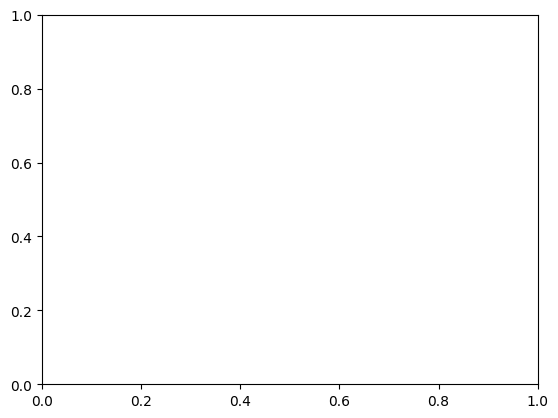

In [ ]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************
import matplotlib.pyplot as plt

# Generación del boxplot
fig, ax = plt.subplots()
ax.boxplot(resultados.values())
ax.set_xticklabels(resultados.keys())
ax.set_title('Comparación de Modelos')
ax.set_ylabel('Métrica Seleccionada')
plt.show()

# *********** Aquí termina la sección de agregar código *************


# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [ ]:
!pip install imbalanced-learn

In [ ]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

# ************* Inlcuye aquí tu código:**************************

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Suponiendo que ya has identificado los tres mejores modelos con sus nombres en la lista best_models:
# best_models = ['LR', 'RF', 'SVM']  # Ejemplo de modelos seleccionados

# Creación de tres mejores modelos con sus parámetros ya definidos
top_model_1 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
top_model_2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
top_model_3 = SVC(kernel='rbf', C=1.0)

# Diccionario para mapear los modelos
best_models_dict = {'LR': top_model_1, 'RF': top_model_2, 'SVM': top_model_3}

# Técnica de balanceo de clases elegida: SMOTE
balancer = SMOTE()

# Configuración de la validación cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Iterar a través de los modelos seleccionados y desplegar las métricas
for model_key in best_models:
    # Crear el pipeline que incluye el balanceo de clases y el modelo
    model = best_models_dict[model_key]
    pipeline = ImbPipeline(steps=[('balancer', balancer), ('model', model)])

    # Calcular métricas utilizando validación cruzada
    scores_accuracy = cross_val_score(pipeline, Xtrainval, ytrainval, scoring='accuracy', cv=cv, n_jobs=-1)
    scores_precision = cross_val_score(pipeline, Xtrainval, ytrainval, scoring='precision', cv=cv, n_jobs=-1)
    scores_recall = cross_val_score(pipeline, Xtrainval, ytrainval, scoring='recall', cv=cv, n_jobs=-1)
    scores_f1 = cross_val_score(pipeline, Xtrainval, ytrainval, scoring='f1', cv=cv, n_jobs=-1)

    # Desplegar las métricas del modelo actual
    print(f'Modelo: {model_key}')
    print(f'Accuracy promedio: {np.mean(scores_accuracy):.3f}')
    print(f'Precision promedio: {np.mean(scores_precision):.3f}')
    print(f'Recall promedio: {np.mean(scores_recall):.3f}')
    print(f'F1-Score promedio: {np.mean(scores_f1):.3f}')
    print()

# *********** Aquí termina la sección de agregar código *************

NameError: name 'LogisticRegression' is not defined

# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++



### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 13**

In [ ]:
# Con dicho mejor modelo y utilizando la técnica de validación cruzada, busca
# los mejores hiperparámetros de dicho modelo y despliega todas las métricas que
#se han estado desplegando. Verifica que tu modelo no esté sobreentrenado e indica
# cuáles son los mejores valores obtenidos de los hiperparámetros.


# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************


## **Ejercicio 14**

In [ ]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.


# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************


In [ ]:
# b.	Obtener la matriz de confusión.

# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************

In [ ]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

### ++++++++ Inicia la sección de agregar texto: +++++++++++



### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ###**Fin de la Actividad de las Semanas 5 y 6.**